In [146]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from xgboost import XGBClassifier
from collections import Counter
from sklearn.metrics import roc_auc_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [6]:
cd ..

c:\Users\teuta\Desktop\vscode\algorithmic_fairness_and_interpretability\interpretability_fairness_project


c:\Users\teuta\Desktop\vscode\algorithmic_fairness_and_interpretability\.venv\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [137]:
pd.set_option("display.max_columns", None)

In [275]:
dataset = pd.read_csv("data/train.csv", index_col=0)

In [276]:
dataset

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
ID,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0


In [277]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    object 
 12  ethnicity        800 non-null    object 
 13  jaundice         800 non-null    object 
 14  austim           800 non-null    object 
 15  contry_of_res    800 non-null    object 
 16  used_app_before  800 non-null    object 
 17  result           800 

In [278]:
Counter(dataset["Class/ASD"])

Counter({0: 639, 1: 161})

# Label encoding

In [279]:
cat = dataset.select_dtypes(['object']).columns 
encoding_dict = dict()
for c in cat:
    encoder = LabelEncoder()
    dataset[c] = encoder.fit_transform(dataset[c])


# Correlation

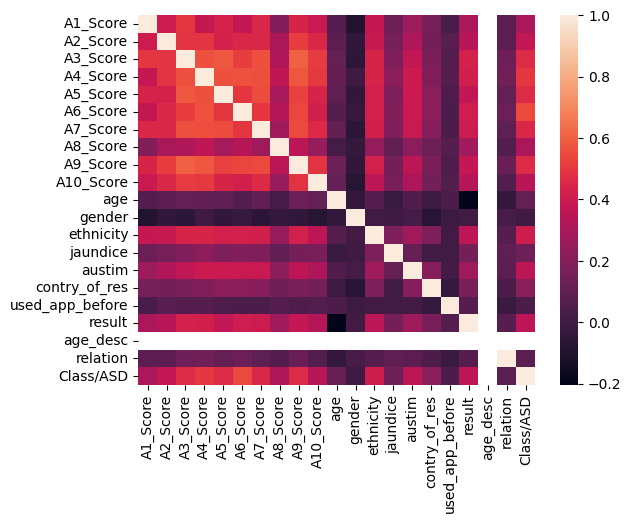

In [280]:
sns.heatmap(dataset.corr());

# Preprocessing

In [281]:
df = dataset.drop(["age_desc"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 800 entries, 1 to 800
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         800 non-null    int64  
 1   A2_Score         800 non-null    int64  
 2   A3_Score         800 non-null    int64  
 3   A4_Score         800 non-null    int64  
 4   A5_Score         800 non-null    int64  
 5   A6_Score         800 non-null    int64  
 6   A7_Score         800 non-null    int64  
 7   A8_Score         800 non-null    int64  
 8   A9_Score         800 non-null    int64  
 9   A10_Score        800 non-null    int64  
 10  age              800 non-null    float64
 11  gender           800 non-null    int32  
 12  ethnicity        800 non-null    int32  
 13  jaundice         800 non-null    int32  
 14  austim           800 non-null    int32  
 15  contry_of_res    800 non-null    int32  
 16  used_app_before  800 non-null    int32  
 17  result           800 

In [282]:
# cat_var = ['sex', 'Married', 'Number_children', 'education_level',
#             'total_members', 'incoming_salary', 'incoming_own_farm',
#             'incoming_business', 'incoming_no_business', 'labor_primary',
#             'depressed']
# for col in cat_var:
#     df[col] = df[col].astype('category')
# df.info()

In [283]:
continuous_var = df.select_dtypes(['int64']).columns

scaler = MinMaxScaler()
df[continuous_var] = scaler.fit_transform(df[continuous_var])

# Modelling

In [298]:
df = df.dropna()
X = df.drop("Class/ASD", axis=1)
y = df["Class/ASD"]

### Oversampling

In [286]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
smote = SMOTE(random_state=42)  # You can set a random seed for reproducibility
X_train, y_train = smote.fit_resample(X, y)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Undersampling

In [287]:
# X_train["depressed"] = y_train
# train1 = X_train[X_train["depressed"]==1]
# train0 = X_train[X_train["depressed"]==0].sample(len(train1))
# train = pd.concat([train1, train0])
# X_train = train.drop("depressed", axis=1)
# y_train = train["depressed"]

In [326]:
model = XGBClassifier( tree_method="hist", device="cuda",
                       objective="binary:logistic",
                         eval_metric="auc"
                         )
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [327]:
y_pred = model.predict(X_test)
auc_score = roc_auc_score(y_test, y_pred)
auc_score

1.0

In [328]:
from sklearn.model_selection import cross_val_score
#clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(model, X, y, cv=5, scoring="roc_auc")
print(scores, scores.mean())
y_pred

[0.83984375 0.89526367 0.91772461 0.87573242 0.91935099] 0.8895830886684264


array([0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0])

In [329]:
confusion_matrix(y_pred, y_test)

array([[127,   0],
       [  0,  33]], dtype=int64)

In [347]:
importance = list()
for i, l in zip(X_train.columns, model.feature_importances_):
    importance.append([i, float(l)])
    print(i, l)

A1_Score 0.014050829
A2_Score 0.018696796
A3_Score 0.058028355
A4_Score 0.12950502
A5_Score 0.08567549
A6_Score 0.40223935
A7_Score 0.028293686
A8_Score 0.03292552
A9_Score 0.10617435
A10_Score 0.019745318
age 0.011153995
gender 0.008559208
ethnicity 0.013870986
jaundice 0.013669549
austim 0.0119075505
contry_of_res 0.01090513
used_app_before 0.0
result 0.009055509
relation 0.02554331


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'A1_Score'),
  Text(1, 0, 'A2_Score'),
  Text(2, 0, 'A3_Score'),
  Text(3, 0, 'A4_Score'),
  Text(4, 0, 'A5_Score'),
  Text(5, 0, 'A6_Score'),
  Text(6, 0, 'A7_Score'),
  Text(7, 0, 'A8_Score'),
  Text(8, 0, 'A9_Score'),
  Text(9, 0, 'A10_Score'),
  Text(10, 0, 'age'),
  Text(11, 0, 'gender'),
  Text(12, 0, 'ethnicity'),
  Text(13, 0, 'jaundice'),
  Text(14, 0, 'austim'),
  Text(15, 0, 'contry_of_res'),
  Text(16, 0, 'used_app_before'),
  Text(17, 0, 'result'),
  Text(18, 0, 'relation')])

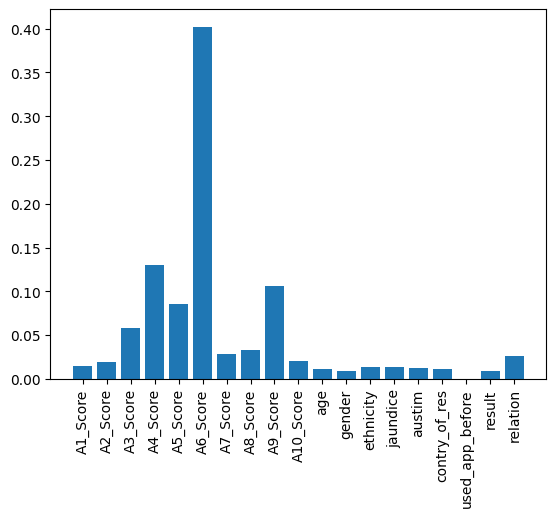

In [351]:
import matplotlib.pyplot as plt
plt.bar(X_train.columns, model.feature_importances_)
plt.xticks(rotation=90)

In [345]:
skf = StratifiedKFold(n_splits=2)

for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

'0.014050829224288464'